In [1]:
%pip install yfinance pandas scikit-learn xgboost

In [2]:
import yfinance as yf
import os
import pandas as pd

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-01 00:00:00+00:00,58969.800781,59062.070312,57217.824219,57325.488281,24592449997,0.0,0.0
2024-09-02 00:00:00+00:00,57326.968750,59403.070312,57136.027344,59112.480469,27036454524,0.0,0.0
2024-09-03 00:00:00+00:00,59106.191406,59815.058594,57425.167969,57431.023438,26666961053,0.0,0.0


In [6]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

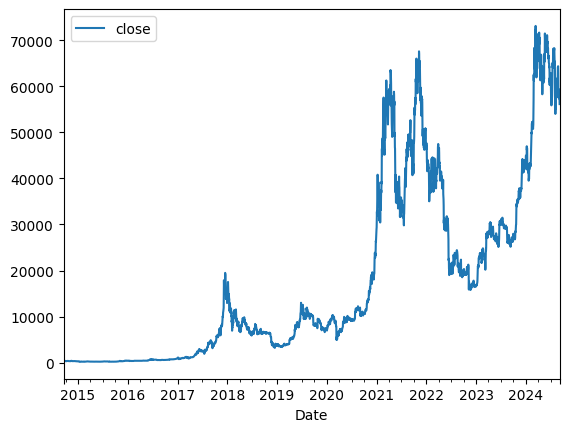

In [9]:
btc.plot.line(y="close", use_index=True)

In [10]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-09-01,0.166667,0.024292,0.066667
2024-09-02,0.166667,0.024292,0.066667
2024-09-03,0.166667,0.024292,0.066667
2024-09-04,0.166667,0.024292,0.066667


In [14]:
# Convert the 'wiki' DataFrame's index to be tz-aware.
wiki.index = wiki.index.tz_localize('UTC')

In [15]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [17]:
btc["tomorrow"] = btc["close"].shift(-1)

In [18]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [19]:
btc["target"].value_counts()

,count
target,
1,1922
0,1720


In [20]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-09-01 00:00:00+00:00,58969.800781,59062.070312,57217.824219,57325.488281,24592449997,0.166667,0.024292,0.066667,59112.480469,1
2024-09-02 00:00:00+00:00,57326.968750,59403.070312,57136.027344,59112.480469,27036454524,0.166667,0.024292,0.066667,57431.023438,0
2024-09-03 00:00:00+00:00,59106.191406,59815.058594,57425.167969,57431.023438,26666961053,0.166667,0.024292,0.066667,57971.539062,1
2024-09-04 00:00:00+00:00,57430.347656,58511.570312,55673.164062,57971.539062,35627680312,0.166667,0.024292,0.066667,56125.027344,0


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [26]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.75

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [28]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [39]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [40]:
predictions["predictions"].value_counts()

,count
predictions,
1,1462
0,1085


In [41]:
precision_score(predictions["target"], predictions["predictions"])

0.5047879616963065

In [42]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [43]:
btc, new_predictors = compute_rolling(btc.copy())

In [44]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01 00:00:00+00:00,58969.800781,59062.070312,57217.824219,57325.488281,24592449997,0.166667,0.024292,0.066667,59112.480469,1,...,0.0,0.964112,0.190476,0.142857,0.935476,0.285556,0.466667,1.113502,1.921096,0.515068
2024-09-02 00:00:00+00:00,57326.968750,59403.070312,57136.027344,59112.480469,27036454524,0.166667,0.024292,0.066667,57431.023438,0,...,0.5,1.003249,0.176190,0.285714,0.964078,0.285556,0.483333,1.146192,1.919909,0.515068
2024-09-03 00:00:00+00:00,59106.191406,59815.058594,57425.167969,57431.023438,26666961053,0.166667,0.024292,0.066667,57971.539062,1,...,0.5,0.979636,0.171429,0.285714,0.936459,0.285556,0.483333,1.111721,1.918721,0.515068
2024-09-04 00:00:00+00:00,57430.347656,58511.570312,55673.164062,57971.539062,35627680312,0.166667,0.024292,0.066667,56125.027344,0,...,0.5,0.991407,0.171429,0.428571,0.945358,0.285556,0.483333,1.120271,1.917534,0.517808


In [49]:
btc.to_csv("datasets/btc_dataset.csv")

In [45]:
predictions = backtest(btc, model, new_predictors)

In [47]:
precision_score(predictions["target"], predictions["predictions"])

0.5235732009925558

In [48]:
predictions

,target,predictions
2017-09-16 00:00:00+00:00,0,0
2017-09-17 00:00:00+00:00,1,1
2017-09-18 00:00:00+00:00,0,0
2017-09-19 00:00:00+00:00,0,1
2017-09-20 00:00:00+00:00,0,1
...,...,...
2024-09-01 00:00:00+00:00,1,1
2024-09-02 00:00:00+00:00,0,0
2024-09-03 00:00:00+00:00,1,1
2024-09-04 00:00:00+00:00,0,0
